# Title : Analyzing Bank Churn Rate

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path = '/content/drive/MyDrive/Data_Portfolio/BankChurners.csv'
import pandas as pd
data = pd.read_csv(path)

In [9]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


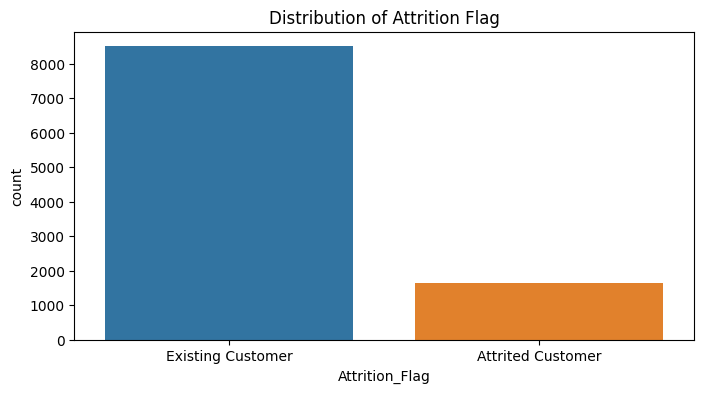

(          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
 count  1.012700e+04  10127.000000     10127.000000    10127.000000   
 mean   7.391776e+08     46.325960         2.346203       35.928409   
 std    3.690378e+07      8.016814         1.298908        7.986416   
 min    7.080821e+08     26.000000         0.000000       13.000000   
 25%    7.130368e+08     41.000000         1.000000       31.000000   
 50%    7.179264e+08     46.000000         2.000000       36.000000   
 75%    7.731435e+08     52.000000         3.000000       40.000000   
 max    8.283431e+08     73.000000         5.000000       56.000000   
 
        Total_Relationship_Count  Months_Inactive_12_mon  \
 count              10127.000000            10127.000000   
 mean                   3.812580                2.341167   
 std                    1.554408                1.010622   
 min                    1.000000                0.000000   
 25%                    3.000000                2.000000   

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical features
numerical_summary = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

# Count plot for the 'Attrition_Flag' (target variable)
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Attrition_Flag')
plt.title('Distribution of Attrition Flag')
plt.show()

# Display the summary statistics and missing values
numerical_summary, missing_values


In [13]:
y = data['Attrition_Flag']
# Churn Rate Calculation
churn_rate_overall = y.value_counts(normalize=True) * 100

# Churn rates within different segments
# Here we look at a few categories: Gender, Age, Income Category, and Education Level
churn_rate_by_gender = data.groupby('Gender')['Attrition_Flag'].value_counts(normalize=True).unstack() * 100
churn_rate_by_income = data.groupby('Income_Category')['Attrition_Flag'].value_counts(normalize=True).unstack() * 100
churn_rate_by_education = data.groupby('Education_Level')['Attrition_Flag'].value_counts(normalize=True).unstack() * 100

churn_rate_overall, churn_rate_by_gender, churn_rate_by_income, churn_rate_by_education



(Existing Customer    83.934038
 Attrited Customer    16.065962
 Name: Attrition_Flag, dtype: float64,
 Attrition_Flag  Attrited Customer  Existing Customer
 Gender                                              
 F                       17.357223          82.642777
 M                       14.615223          85.384777,
 Attrition_Flag   Attrited Customer  Existing Customer
 Income_Category                                      
 $120K +                  17.331499          82.668501
 $40K - $60K              15.139665          84.860335
 $60K - $80K              13.480742          86.519258
 $80K - $120K             15.765472          84.234528
 Less than $40K           17.186184          82.813816
 Unknown                  16.816547          83.183453,
 Attrition_Flag   Attrited Customer  Existing Customer
 Education_Level                                      
 College                  15.202369          84.797631
 Doctorate                21.064302          78.935698
 Graduate          